# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# importing module
import warnings
  

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression  


In [3]:
# import file
student = pd.read_excel(r'D:\Student_marks.xlsx')

In [4]:
# Top % rows
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Tail of the data
student.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
# Info
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# describe
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# Checking Null Value
student.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
# Unique 
student.nunique()

Hours     23
Scores    23
dtype: int64

In [10]:
# value_counts
student.Hours.value_counts().head()

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
Name: Hours, dtype: int64

In [11]:
student.columns

Index(['Hours', 'Scores'], dtype='object')

# Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
- We'll visualise our data using matplotlib and seaborn.

<Figure size 2880x864 with 0 Axes>

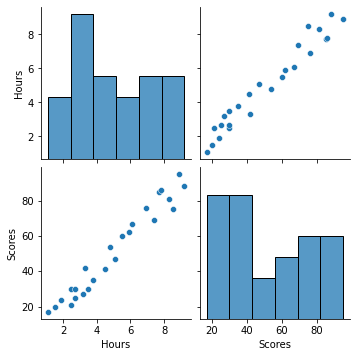

In [12]:
# visualising the numeric variables
plt.figure(figsize=(40,12))
sns.pairplot(student)
plt.show()

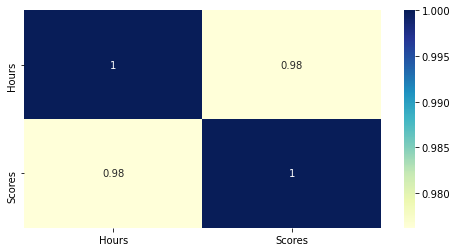

In [13]:
plt.figure(figsize=(8,4))
sns.heatmap(student.corr(),cmap='YlGnBu',annot=True)
plt.show()

Text(0, 0.5, 'Percentage score')

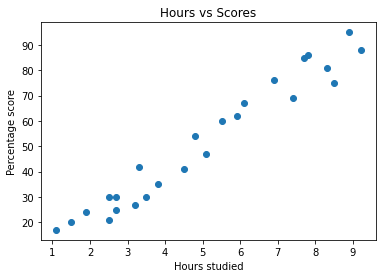

In [14]:
# Plotting the distribution of the score
plt.scatter(x= 'Hours',y='Scores',data= student)
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')

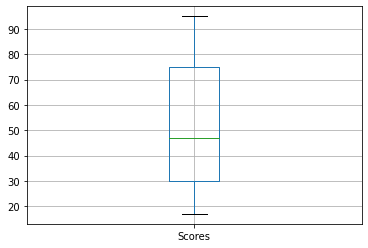

In [15]:
student.boxplot(column=['Scores'])
plt.show()

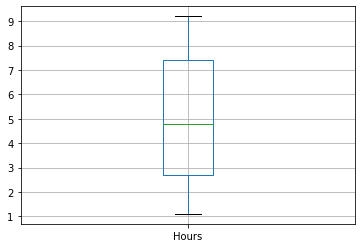

In [16]:
student.boxplot(column=['Hours'])
plt.show()

# Step 3: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [17]:
# we specify this so the train and test data set always has the same rows, respectively.
np.random.seed(0)
df_train,df_test = train_test_split(student,train_size=0.7,test_size=0.3,random_state=100)

# Dividing into X and Y sets for the model building

In [18]:
y_train = df_train.pop('Scores')
X_train = df_train

In [19]:
X_train.head()

,Hours
6,9.2
12,4.5
4,3.5
24,7.8
0,2.5


In [20]:
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [21]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()    
regressor.fit(X_train, y_train) 

LinearRegression()

In [36]:
X_train_rfe = sm.add_constant(X_train)

In [37]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [38]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           1.15e-11
Time:                        19:05:23   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

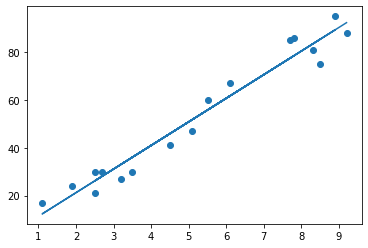

In [24]:
# Plotting the regression line
line = regressor.coef_*X_train+regressor.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train)
plt.plot(X_train,line);
plt.show()

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [25]:
y_test = df_test.pop('Scores')
X_test = df_test

In [27]:
X_test
y_pred = regressor.predict(X_test)

In [30]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


In [39]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9309458862687437

In [40]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.7917070319458213)*(11-1)/(11-1-1)
print(Adj_r2)

0.7685633688286903
